# Networkx
- NetworkX is a Python language software package for <u>the creation, manipulation, and study of the structure, dynamics, and functions of complex networks</u>.
- http://networkx.github.io
- The goals
    - tools for the study of the structure and dynamics of social, biological, and infrastructure networks,
    - a standard programming interface and graph implementation that is suitable for many applications,
    - a rapid development environment for collaborative, multidisciplinary projects,
    - an interface to existing numerical algorithms and code written in C, C++, and FORTRAN,
the ability to painlessly slurp in large nonstandard data sets.


# Tutorial
## Creating a graph

In [1]:
# Create an empty graph with no nodes and no edges
import networkx as nx

G=nx.Graph()

- $Graph()$ is a <u>collection of nodes (vertices) along with identified pairs of nodes</u> (called edges, links, etc)
- Nodes can be <u>any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object</u>, etc.

## Nodes

In [20]:
# add one node at a time
G.add_node(1)

G.node

{1: {}}

In [21]:
# add a list of nodes
G.add_nodes_from([2,3])

G.node

{1: {}, 2: {}, 3: {}}

In [22]:
# add any nbunch of nodes. 
# An nbunch is any iterable container of nodes that is not itself a node in the graph. (e.g. a list, set, graph, file, etc..)
H=nx.path_graph(10)
G.add_nodes_from(H)

G.node

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}

In [23]:
# G now contains H as nodes of G
G.add_node(H)

G.node

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 <networkx.classes.graph.Graph at 0x110a99908>: {}}

## Edges

In [15]:
# adding one edge at a time
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)  # unpack edge tuple *

G.edge

{0: {},
 1: {2: {}, 3: {}},
 2: {1: {}, 3: {}},
 3: {1: {}, 2: {}},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 <networkx.classes.graph.Graph at 0x1109fb2b0>: {}}

In [16]:
# adding a list of edges
G.add_edges_from([(1,2),(1,3)])

G.edge

{0: {},
 1: {2: {}, 3: {}},
 2: {1: {}, 3: {}},
 3: {1: {}, 2: {}},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 <networkx.classes.graph.Graph at 0x1109fb2b0>: {}}

In [17]:
# adding any ebunch of edges
# An ebunch is any iterable container of edge-tuples.
# An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g. (2,3,{‘weight’:3.1415}).
G.add_edges_from(H.edges())

G.edge

{0: {1: {}},
 1: {0: {}, 2: {}, 3: {}},
 2: {1: {}, 3: {}},
 3: {1: {}, 2: {}, 4: {}},
 4: {3: {}, 5: {}},
 5: {4: {}, 6: {}},
 6: {5: {}, 7: {}},
 7: {6: {}, 8: {}},
 8: {7: {}, 9: {}},
 9: {8: {}},
 <networkx.classes.graph.Graph at 0x1109fb2b0>: {}}

In [24]:
# demolish the graph
G.remove_node(H)

G.edge

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}

In [25]:
# removing all nodes and edges,
G.clear()

G.edge

{}

In [61]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

print(G.node)
print(G.edge)

{1: {}, 2: {}, 3: {}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {}}
{1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}}, 'spam': {}, 's': {}, 'p': {}, 'a': {}, 'm': {}}


In [62]:
G.number_of_nodes()

8

In [63]:
G.number_of_edges()

2

In [64]:
G.nodes()

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [65]:
G.edges()

[(1, 2), (1, 3)]

In [66]:
G.neighbors(1)

[2, 3]

In [67]:
#Removing nodes or edges
G.remove_nodes_from("spam")
G.nodes()

[1, 2, 3, 'spam']

In [68]:
G.remove_edge(1,3)

G.edges()

[(1, 2)]

In [74]:
# creating a graph structure by instantiating one of the graph classes
H = nx.DiGraph(G)
H.edges()

[(1, 2), (2, 1)]

In [78]:
edgelist = [(0,1),(1,2),(2,3)]
H = nx.Graph(edgelist)

## What to use as nodes and edges
- nodes and edges are not specified as NetworkX objects
- free to use meaningful items as nodes and edges
- The most common choices are numbers or strings, but a node can be any hashable object (except None), and an edge can be associated with any object x using G.add_edge(n1,n2,object=x)

## Accessing edges

In [83]:
# direct access to the graph data structur
G[1]

{2: {}}

In [82]:
G[1][2]

{}

In [85]:
# set the attributes of an edge using subscript notation if the edge already exists
G.add_edge(1, 3)
G[1][3]['color'] = 'blue'

In [96]:
# Fast examination of all edges is achieved using adjacency iterators. 
# Note that for undirected graphs this actually looks at each edge twice.
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])

for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [97]:
# Convenient access to all edges is achieved with the edges method
for (u,v,d) in FG.edges(data='weight'):
    if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))

(4, 3, 0.125)
(4, 3, 0.375)


## Adding attributes to graphs, nodes, and edges
- Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.
- Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable).
- By default these are empty, but attributes can be added or changed using add_edge, add_node or direct manipulation of the attribute dictionaries named G.graph, G.node and G.edge for a graph G.

### Graph attributes

In [98]:
# Assign graph attributes when creating a new graph
G = nx.Graph(day="Friday")

G.graph

{'day': 'Friday'}

In [101]:
# modify attributes later
G.graph['day']='Monday'

G.graph

{'day': 'Monday'}

### Node attributes
- Add node attributes using add_node(), add_nodes_from() or G.node

In [102]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]

{'time': '5pm'}

In [106]:
G.node[1]['room'] = 714
G.nodes(data=True)

[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

### Edge Attributes
- Add edge attributes using add_edge(), add_edges_from(), subscript notation, or G.edge.

In [108]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

## Directed graphs
- The $DiGraph$ class provides additional methods specific to directed edges

In [110]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1,weight='weight')

0.5

In [115]:
DG.degree(1,weight='weight')

1.25

In [116]:
DG.successors(1)

[2]

In [117]:
DG.neighbors(1)

[2]

## Multigraphs
- classes for graphs which allow multiple edges between any pair of nodes.

In [119]:
MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])
MG.degree(weight='weight')

{1: 1.25, 2: 1.75, 3: 0.5}

In [121]:
GG=nx.Graph()
for n,nbrs in MG.adjacency_iter():
    for nbr,edict in nbrs.items():
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)
        
nx.shortest_path(GG,1,3)

[1, 2, 3]

## Graph generators and graph operations

|method|description|
|---|----|
|subgraph(G, nbunch)|induce subgraph of G on nodes in nbunch|
|union(G1,G2)|graph union|
|disjoint_union(G1,G2)  |graph union assuming all nodes are different|
|cartesian_product(G1,G2)|return Cartesian product graph|
|compose(G1,G2)|combine graphs identifying nodes common to both|
|complement(G)|graph complement|
|create_empty_copy(G)|return an empty copy of the same graph class|
|convert_to_undirected(G)|return an undirected representation of G|
|convert_to_directed(G) |return a directed representation of G|

## Analyzing graphs

In [122]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node("spam") 

In [132]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [133]:
sorted(nx.degree(G).values())

[0, 1, 1, 2]

In [134]:
nx.clustering(G)

{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}

In [135]:
nx.degree(G)

{1: 2, 2: 1, 3: 1, 'spam': 0}

## Drawing graphs
- NetworkX is not primarily a graph drawing package but basic drawing with <u>Matplotlib</u> as well as an interface to use the open source <u>Graphviz</u> software package are included.

In [136]:
import matplotlib.pyplot as plt

/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem

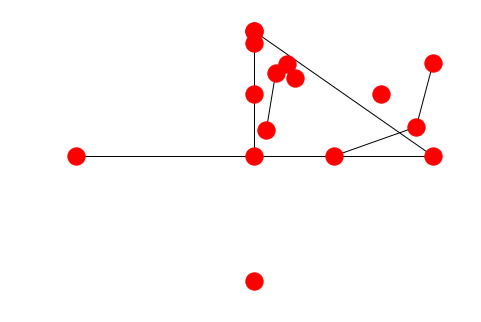

In [139]:
# to test
nx.draw(G)
nx.draw_random(G)
nx.draw_circular(G)
nx.draw_spectral(G)

plt.show()

In [140]:
# to save drawing to a file
nx.draw(G)
plt.savefig("./path.png")

/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/etc/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be rem